In [1]:
%run app.py


ModuleNotFoundError: No module named 'sklearn'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
from ydata_profiling import ProfileReport

In [4]:
data = pd.read_csv("stroke_risk_dataset_v2.csv")
data

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,Female,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0
34996,29,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0
34997,44,Female,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0
34998,28,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0


In [38]:
profile = ProfileReport(data, title="Stroke Risk Data Profile", explorative=True)
profile.to_file("stroke_risk_profile.html")
shw_pro = display(profile.to_notebook_iframe())
shw_pro

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

None

In [5]:
data.isna().sum()

age                       0
gender                    0
chest_pain                0
high_blood_pressure       0
irregular_heartbeat       0
shortness_of_breath       0
fatigue_weakness          0
dizziness                 0
swelling_edema            0
neck_jaw_pain             0
excessive_sweating        0
persistent_cough          0
nausea_vomiting           0
chest_discomfort          0
cold_hands_feet           0
snoring_sleep_apnea       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe = OneHotEncoder(sparse_output=False,drop="first")
encoded_df = ohe.fit_transform(data[["gender"]])
encoded_df

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [8]:
encoded_data = pd.DataFrame(encoded_df,columns=ohe.get_feature_names_out(["gender"]),index=data.index)

In [9]:
encoded_data

,gender_Male
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
34995,0.0
34996,0.0
34997,0.0
34998,0.0


#### Dropping the gender column and adding new encoded gender column

In [10]:
data.drop("gender",inplace=True,axis=1)

In [11]:
data

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0


In [12]:
data = pd.concat([data,encoded_data],axis=1)
data

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk,gender_Male
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0,1.0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1,1.0
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1,0.0
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0,1.0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0,0.0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0,0.0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0,0.0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0,0.0


#### creating x and y

In [13]:
X = data.drop("at_risk",axis=1)
y = data["at_risk"]

In [14]:
X

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,gender_Male
0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,1.0
1,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1.0
2,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,0.0
3,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,1.0
4,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0.0
34996,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0.0
34997,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0.0
34998,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0.0


In [15]:
y

0        0
1        1
2        1
3        0
4        1
        ..
34995    0
34996    0
34997    0
34998    0
34999    0
Name: at_risk, Length: 35000, dtype: int64

#### Splitting data into test & train

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [18]:
X_train

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,gender_Male
16484,43,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,46.9,0.0
7587,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3,0.0
18670,26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,14.8,1.0
18863,41,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,29.5,1.0
15471,56,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1,0.0
15377,27,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,40.3,1.0
17730,32,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,30.7,0.0
28030,54,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,73.2,1.0


####  Standarization (Scaling the data)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [21]:
X_train_scaled

array([[ 0.38293184, -0.41489353,  1.73122641, ..., -0.33167742,
         0.08488696, -0.99657729],
       [-0.48410234, -0.41489353, -0.5776252 , ..., -0.33167742,
        -1.27776922, -0.99657729],
       [-1.09102626, -0.41489353, -0.5776252 , ..., -0.33167742,
        -0.99248406,  1.00343447],
       ...,
       [-0.57080576, -0.41489353, -0.5776252 , ..., -0.33167742,
        -0.45883299, -0.99657729],
       [ 1.33666943, -0.41489353, -0.5776252 , ..., -0.33167742,
         0.96759281,  1.00343447],
       [-0.91761943, -0.41489353, -0.5776252 , ..., -0.33167742,
        -0.4521204 ,  1.00343447]])

In [22]:
X_test_scaled

array([[ 1.12839214, -0.40657981,  1.69207998, ..., -0.32641143,
         1.81837246,  0.99430195],
       [-0.24113451, -0.40657981, -0.59098861, ..., -0.32641143,
        -0.05405994, -1.00573071],
       [-0.32672993, -0.40657981, -0.59098861, ..., -0.32641143,
        -0.44703958,  0.99430195],
       ...,
       [-0.84030242, -0.40657981, -0.59098861, ..., -0.32641143,
        -0.93908972,  0.99430195],
       [ 1.38517838, -0.40657981,  1.69207998, ..., -0.32641143,
         1.66316202, -1.00573071],
       [-1.09708867, -0.40657981,  1.69207998, ..., -0.32641143,
        -0.94899677, -1.00573071]])

#### MODEL TRAINING

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

#### MODEL EVALUTION

In [25]:
from sklearn.metrics import classification_report,accuracy_score

In [26]:
y_prediction = lg.predict(X_test_scaled)
print(f"Accuracy{accuracy_score(y_test,y_prediction)}")
print(f"Classification Report{classification_report(y_test,y_prediction)}")


Accuracy0.9932857142857143
Classification Report              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4364
           1       1.00      0.98      0.99      2636

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [27]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,r2_score


In [28]:
models = [
    ('log_Reg' , LogisticRegression()),
    ('decision_tree' , DecisionTreeClassifier()),
    ('neural' , MLPClassifier()),
    ('knn' , KNeighborsClassifier()),
    ('random_forest' , RandomForestClassifier()),
    ('SGD' , SGDClassifier())
]

In [29]:
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_hat_train = model.predict(X_train_scaled)
    
    print(f"Model: {name}")
    print(f"Training Error: {mean_absolute_error(y_train, y_hat_train):.2f}")
    print(f"Training Accuracy: {r2_score(y_train, y_hat_train):.2f}")
    print('-' * 100)
    print()
    
    y_hat_test = model.predict(X_test_scaled)
    print(f"Testing Error: {mean_absolute_error(y_test, y_hat_test):.2f}")
    print(f"Testing Accuracy: {r2_score(y_test, y_hat_test):.2f}")
    print()

Model: log_Reg
Training Error: 0.01
Training Accuracy: 0.98
----------------------------------------------------------------------------------------------------

Testing Error: 0.01
Testing Accuracy: 0.97

Model: decision_tree
Training Error: 0.00
Training Accuracy: 1.00
----------------------------------------------------------------------------------------------------

Testing Error: 0.01
Testing Accuracy: 0.97

Model: neural
Training Error: 0.00
Training Accuracy: 1.00
----------------------------------------------------------------------------------------------------

Testing Error: 0.00
Testing Accuracy: 0.98

Model: knn
Training Error: 0.03
Training Accuracy: 0.86
----------------------------------------------------------------------------------------------------

Testing Error: 0.06
Testing Accuracy: 0.76

Model: random_forest
Training Error: 0.00
Training Accuracy: 1.00
----------------------------------------------------------------------------------------------------

Testing

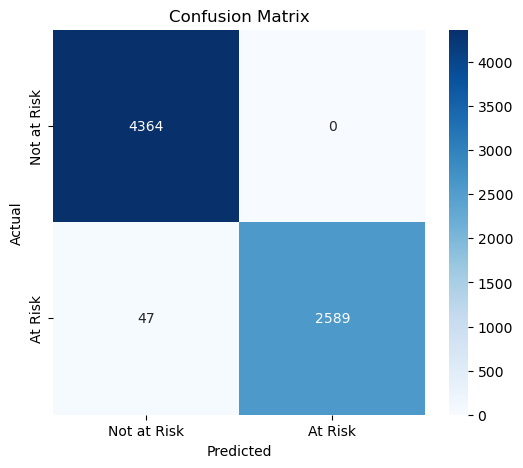

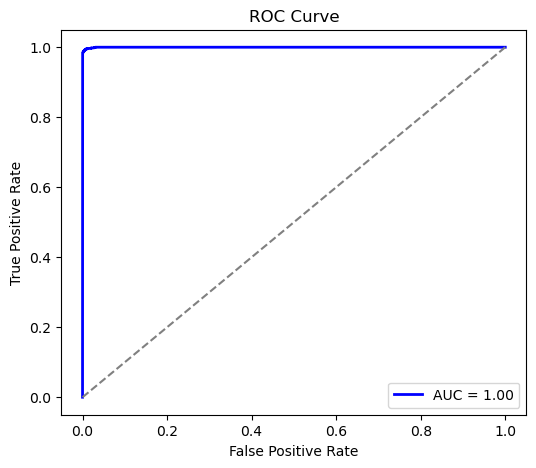

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predict on test data
y_pred = lg.predict(X_test_scaled)
y_prob = lg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not at Risk", "At Risk"], yticklabels=["Not at Risk", "At Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [35]:
# import joblib
# import pandas as pd

# # Load trained model and preprocessing tools
# lg = joblib.load("logistic_regression_model.pkl")
# scaler = joblib.load("scaler.pkl")
# encoder = joblib.load("encoder.pkl")
# feature_names = joblib.load("feature_names.pkl")  # Load correct feature names

# def get_user_input():
#     """Collects user input interactively."""
#     print("\nEnter the following details:")
    
#     user_input = {
#         "age": int(input("Age: ")),
#         "hypertension": int(input("Hypertension (0: No, 1: Yes): ")),
#         "heart_disease": int(input("Heart Disease (0: No, 1: Yes): ")),
#         "ever_married": int(input("Ever Married (0: No, 1: Yes): ")),
#         "work_type": int(input("Work Type (0-4): ")),  # Replace with actual categories
#         "residence_type": int(input("Residence Type (0: Urban, 1: Rural): ")),
#         "avg_glucose_level": float(input("Average Glucose Level: ")),
#         "gender": input("Gender (Male/Female/Other): ").capitalize(),
#         "anxiety_doom": int(input("Anxiety/Doom (0: No, 1: Yes): ")),
#         "chest_discomfort": int(input("Chest Discomfort (0: No, 1: Yes): ")),
#         "chest_pain": int(input("Chest Pain (0: No, 1: Yes): ")),
#         "cold_hands_feet": int(input("Cold Hands/Feet (0: No, 1: Yes): ")),
#         "dizziness": int(input("Dizziness (0: No, 1: Yes): ")),
#     }

#     return user_input

# def predict_stroke():
#     """Predicts stroke risk based on user input."""
#     user_input = get_user_input()
    
#     # Convert to DataFrame
#     user_data = pd.DataFrame([user_input])

#     # One-hot encode 'gender'
#     encoded_gender = encoder.transform(user_data[["gender"]])
#     encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(["gender"]))

#     # Drop original 'gender' and merge encoded data
#     user_data.drop("gender", axis=1, inplace=True)
#     user_data = pd.concat([user_data, encoded_gender_df], axis=1)

#     # Ensure input matches training features
#     user_data = user_data.reindex(columns=feature_names, fill_value=0)

#     # Scale features
#     user_data_scaled = scaler.transform(user_data)

#     # Make prediction
#     prediction = lg.predict(user_data_scaled)

#     # Display result
#     if prediction[0] == 1:
#         print("\n✅ The person is **NOT at risk** of stroke. ✅")

#     else:
#         print("\n⚠️ The person is **AT RISK** of stroke! ⚠️")

# # Run the prediction function
# predict_stroke()



Enter the following details:


Age:  24
Hypertension (0: No, 1: Yes):  0
Heart Disease (0: No, 1: Yes):  0
Ever Married (0: No, 1: Yes):  1
Work Type (0-4):  1
Residence Type (0: Urban, 1: Rural):  1
Average Glucose Level:  75
Gender (Male/Female/Other):  Male
Anxiety/Doom (0: No, 1: Yes):  0
Chest Discomfort (0: No, 1: Yes):  0
Chest Pain (0: No, 1: Yes):  0
Cold Hands/Feet (0: No, 1: Yes):  0
Dizziness (0: No, 1: Yes):  0



⚠️ The person is **AT RISK** of stroke! ⚠️


In [32]:
# import joblib
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.model_selection import train_test_split

# # Load dataset
# data = pd.read_csv("stroke_risk_dataset_v2.csv")

# # One-hot encode 'gender'
# ohe = OneHotEncoder(sparse_output=False, drop="first")
# encoded_df = ohe.fit_transform(data[["gender"]])
# encoded_data = pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out(["gender"]), index=data.index)

# # Drop original 'gender' and merge encoded data
# data.drop("gender", inplace=True, axis=1)
# data = pd.concat([data, encoded_data], axis=1)

# # Define X and y
# X = data.drop("at_risk", axis=1)
# y = data["at_risk"]

# # Save feature names
# feature_names = X.columns.tolist()
# joblib.dump(feature_names, "feature_names.pkl")

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# # Scale data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train model
# lg = LogisticRegression()
# lg.fit(X_train_scaled, y_train)

# # Save model, scaler, and encoder
# joblib.dump(lg, "logistic_regression_model.pkl")
# joblib.dump(scaler, "scaler.pkl")
# joblib.dump(ohe, "encoder.pkl")

# print("✅ Model, scaler, and encoder saved successfully!")


✅ Model, scaler, and encoder saved successfully!


In [33]:
# import joblib
# import pandas as pd

# # Load trained model and preprocessing tools
# lg = joblib.load("logistic_regression_model.pkl")
# scaler = joblib.load("scaler.pkl")
# encoder = joblib.load("encoder.pkl")
# feature_names = joblib.load("feature_names.pkl")  # Load correct feature names

# def predict_stroke():
#     # Get user input (replace with actual values)
#     user_input = {
#         "age": 50,
#         "hypertension": 1,
#         "heart_disease": 0,
#         "ever_married": 1,
#         "work_type": 2,
#         "residence_type": 0,
#         "avg_glucose_level": 120.5,
#         "gender": "Male",
#         # Include all features from training
#         "anxiety_doom": 0,
#         "chest_discomfort": 0,
#         "chest_pain": 1,
#         "cold_hands_feet": 0,
#         "dizziness": 1,
#         # Add other missing features with default values
#     }

#     # Convert to DataFrame
#     user_data = pd.DataFrame([user_input])

#     # One-hot encode 'gender'
#     encoded_gender = encoder.transform(user_data[["gender"]])
#     encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(["gender"]))

#     # Drop original 'gender' and merge encoded data
#     user_data.drop("gender", axis=1, inplace=True)
#     user_data = pd.concat([user_data, encoded_gender_df], axis=1)

#     # Ensure input matches training features
#     user_data = user_data.reindex(columns=feature_names, fill_value=0)

#     # Scale features
#     user_data_scaled = scaler.transform(user_data)

#     # Make prediction
#     prediction = lg.predict(user_data_scaled)

#     # Display result
#     if prediction[0] == 1:
#         print("\n⚠️ The person is **AT RISK** of stroke! ⚠️")
#     else:
#         print("\n✅ The person is **NOT at risk** of stroke. ✅")

# # Run the prediction function
# predict_stroke()



✅ The person is **NOT at risk** of stroke. ✅


In [42]:
profile = ProfileReport(X, title="Stroke Risk Data Profile", explorative=True)
profile.to_file("stroke_risk_profile.html")
shw_pro = display(profile.to_notebook_iframe())
shw_pro

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

None